In [62]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

In [4]:
from PIL import Image
import requests

# reading the image from the url

# get the url
url = 'https://raw.githubusercontent.com/ImageGlass/sample-images/master/Samples/JPG/auto_rotate.jpg'
# open the image from the url
im = Image.open(requests.get(url, stream=True).raw)

In [8]:
# convert to numpy array and check the shape of the image
np.array(im).shape

(3456, 4608, 3)

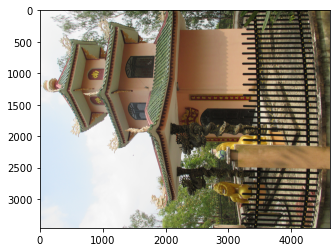

In [11]:
# visualize the image
plt.imshow(im)
plt.show()

In [13]:
# reading the image from the local directory
img = 'Screen Shot 2020-04-08 at 8.56.35 AM.png'
# save the read image in a variable
img_obj = Image.open(img)

In [15]:
# convert it into numpy array
img_array = np.array(img_obj)
# look at the shape
img_array.shape

(673, 1058, 4)

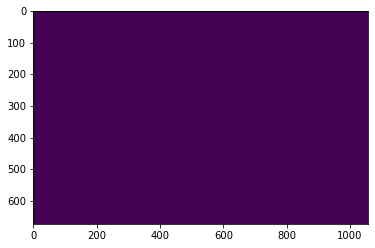

In [56]:
# the last channel (#4 is not providing any information)
plt.imshow(img_array[:,:,3])

(673, 1058, 3)


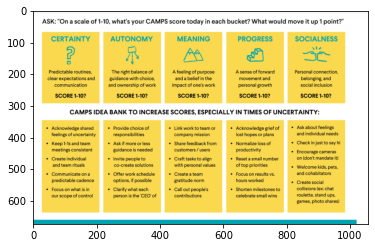

In [60]:
# 4 channels show on the screen shot so let's remove the redundant channel
new_image = img_array[:,:,0:3]
# look at the shape 
print(new_image.shape)
# We have not lost any information of the image
plt.imshow(new_image)
plt.show()

Rotated Image


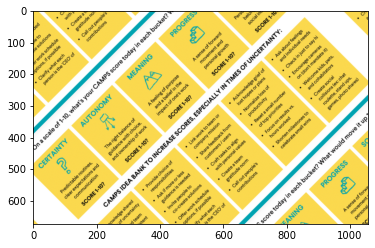

In [66]:
## Rotate the image

print("Rotated Image")

# rotate the image by 45 degrees
rotated = rotate(new_image, angle=45, mode='wrap')
# plot the image
plt.imshow(rotated)
plt.show()

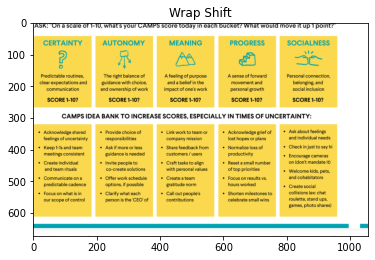

In [68]:
# applying shift operation 
transform = AffineTransform(translation=(25, 25))
wrapShift = warp(new_image, transform, mode='wrap')
plt.imshow(wrapShift)
plt.title("Wrap Shift")
plt.show()

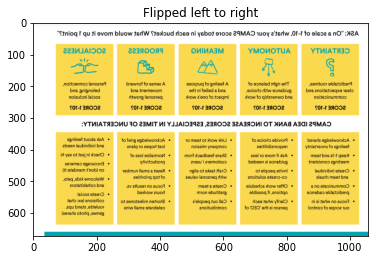

In [71]:
# flip image left to right 
flipLR = np.fliplr(new_image)

# plot the image
plt.imshow(flipLR)
plt.title("Flipped left to right")
plt.show()

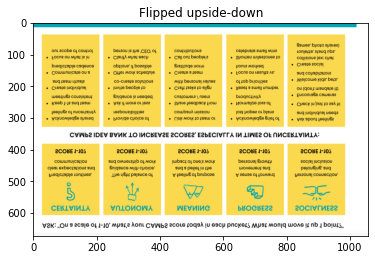

In [72]:
# flip image upside down 
flipLR = np.flipud(new_image)

# plot the image
plt.imshow(flipLR)
plt.title("Flipped upside-down")
plt.show()

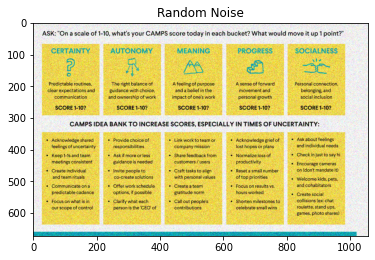

In [76]:
# adding noise to the pixels
sigma = 0.155

noisyRandom = random_noise(new_image, var=sigma**2)

plt.imshow(noisyRandom)
plt.title("Random Noise")
plt.show()

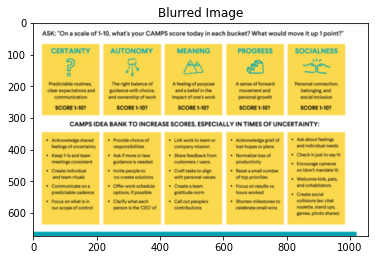

In [82]:
# blurring the image
blurred = gaussian(new_image, sigma=1, multichannel=True)

plt.imshow(blurred)
plt.title("Blurred Image")
plt.show()